In [1]:
import pandas as pd

NODE = [1]
LAYER = [1]
REV = [0,1,2]
APPROACH = ['CL','FL']
POISONED = [0,10,20,30,40,50]
METRICS = ['loss_train', 'acc_train', 'loss_test', 'acc_test']
result_path = 'results'

dt_list = []

for a in APPROACH:
    for n in NODE:
        for l in LAYER:
            for r in REV:
                exp_name = f'{a}_ModelN{n}L{l}_Batchsize32'
                exp_rev_name = f'{a}_ModelN{n}L{l}_Batchsize32_rev{r}'
                for p in POISONED:
                    sub_f_name = f'poisoned_{p}percent'
                    
                    dt_list.append({
                        'NODE':n,
                        'LAYER':l,
                        'REV':r,
                        'APPROACH':a,
                        'EXPERIMENT':exp_name,
                        'EXPERIMENT_REV':exp_rev_name,
                        'POISONED':p,
                        'SUB_FLODER':sub_f_name,
                        'CSV':f'{result_path}\{exp_rev_name}\{sub_f_name}\{sub_f_name}.csv',
                    })

df_exp = pd.DataFrame(dt_list)
print(df_exp.head())

<string>:31: SyntaxWarning: invalid escape sequence '\{'
<string>:31: SyntaxWarning: invalid escape sequence '\{'
<string>:31: SyntaxWarning: invalid escape sequence '\{'
<>:31: SyntaxWarning: invalid escape sequence '\{'
<>:31: SyntaxWarning: invalid escape sequence '\{'
<>:31: SyntaxWarning: invalid escape sequence '\{'
<string>:31: SyntaxWarning: invalid escape sequence '\{'
<string>:31: SyntaxWarning: invalid escape sequence '\{'
<string>:31: SyntaxWarning: invalid escape sequence '\{'
<>:31: SyntaxWarning: invalid escape sequence '\{'
<>:31: SyntaxWarning: invalid escape sequence '\{'
<>:31: SyntaxWarning: invalid escape sequence '\{'
C:\Users\Vitavat\AppData\Local\Temp\ipykernel_10712\80944415.py:31: SyntaxWarning: invalid escape sequence '\{'
  'CSV':f'{result_path}\{exp_rev_name}\{sub_f_name}\{sub_f_name}.csv',
C:\Users\Vitavat\AppData\Local\Temp\ipykernel_10712\80944415.py:31: SyntaxWarning: invalid escape sequence '\{'
  'CSV':f'{result_path}\{exp_rev_name}\{sub_f_name}\{sub_

   NODE  LAYER  REV APPROACH                EXPERIMENT  \
0     1      1    0       CL  CL_ModelN1L1_Batchsize32   
1     1      1    0       CL  CL_ModelN1L1_Batchsize32   
2     1      1    0       CL  CL_ModelN1L1_Batchsize32   
3     1      1    0       CL  CL_ModelN1L1_Batchsize32   
4     1      1    0       CL  CL_ModelN1L1_Batchsize32   

                  EXPERIMENT_REV  POISONED          SUB_FLODER  \
0  CL_ModelN1L1_Batchsize32_rev0         0   poisoned_0percent   
1  CL_ModelN1L1_Batchsize32_rev0        10  poisoned_10percent   
2  CL_ModelN1L1_Batchsize32_rev0        20  poisoned_20percent   
3  CL_ModelN1L1_Batchsize32_rev0        30  poisoned_30percent   
4  CL_ModelN1L1_Batchsize32_rev0        40  poisoned_40percent   

                                                 CSV  
0  results\CL_ModelN1L1_Batchsize32_rev0\poisoned...  
1  results\CL_ModelN1L1_Batchsize32_rev0\poisoned...  
2  results\CL_ModelN1L1_Batchsize32_rev0\poisoned...  
3  results\CL_ModelN1L1_Batchsize3

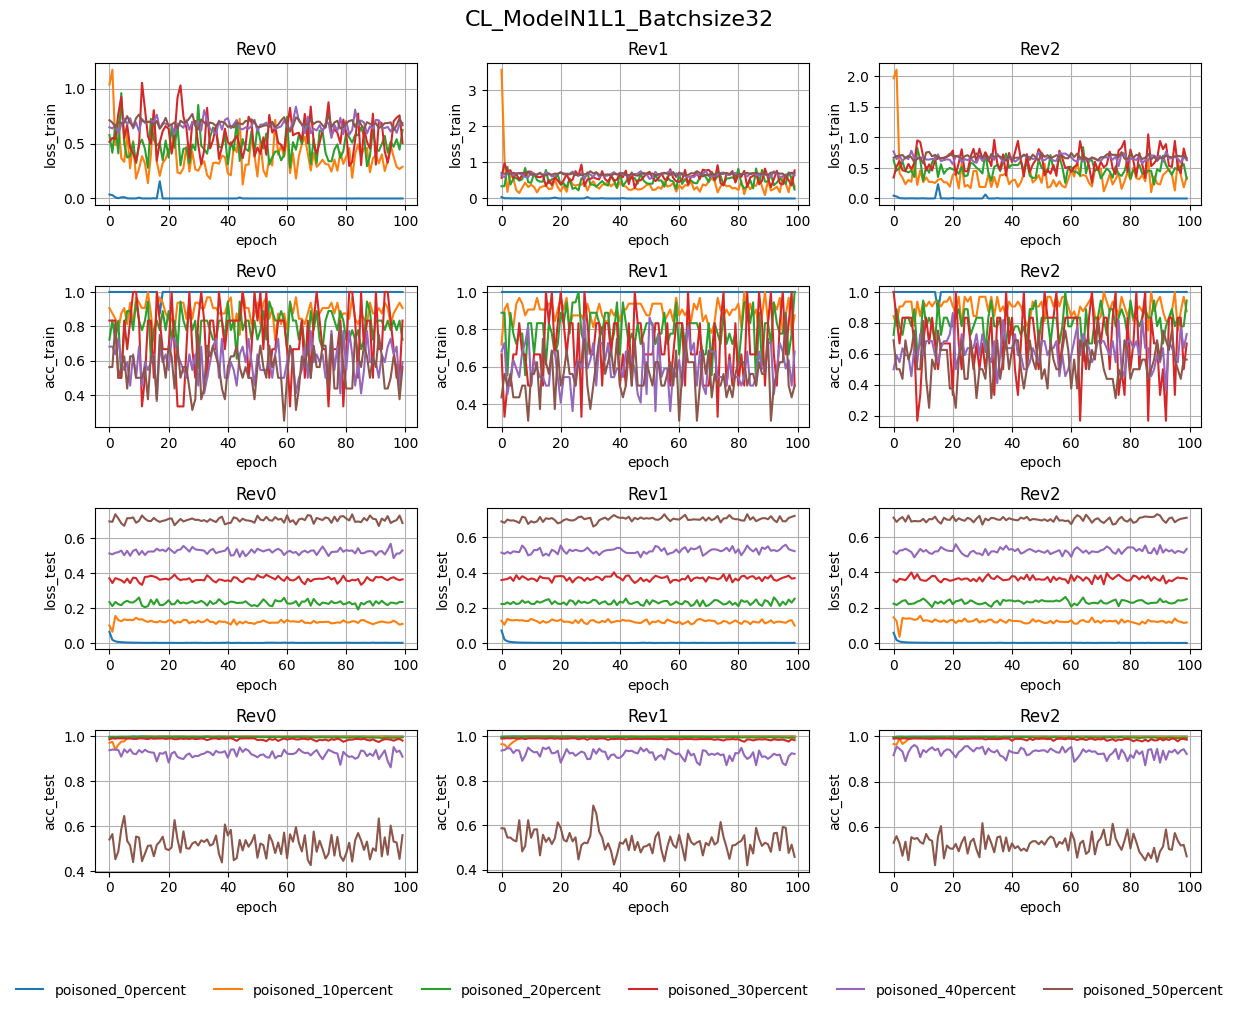

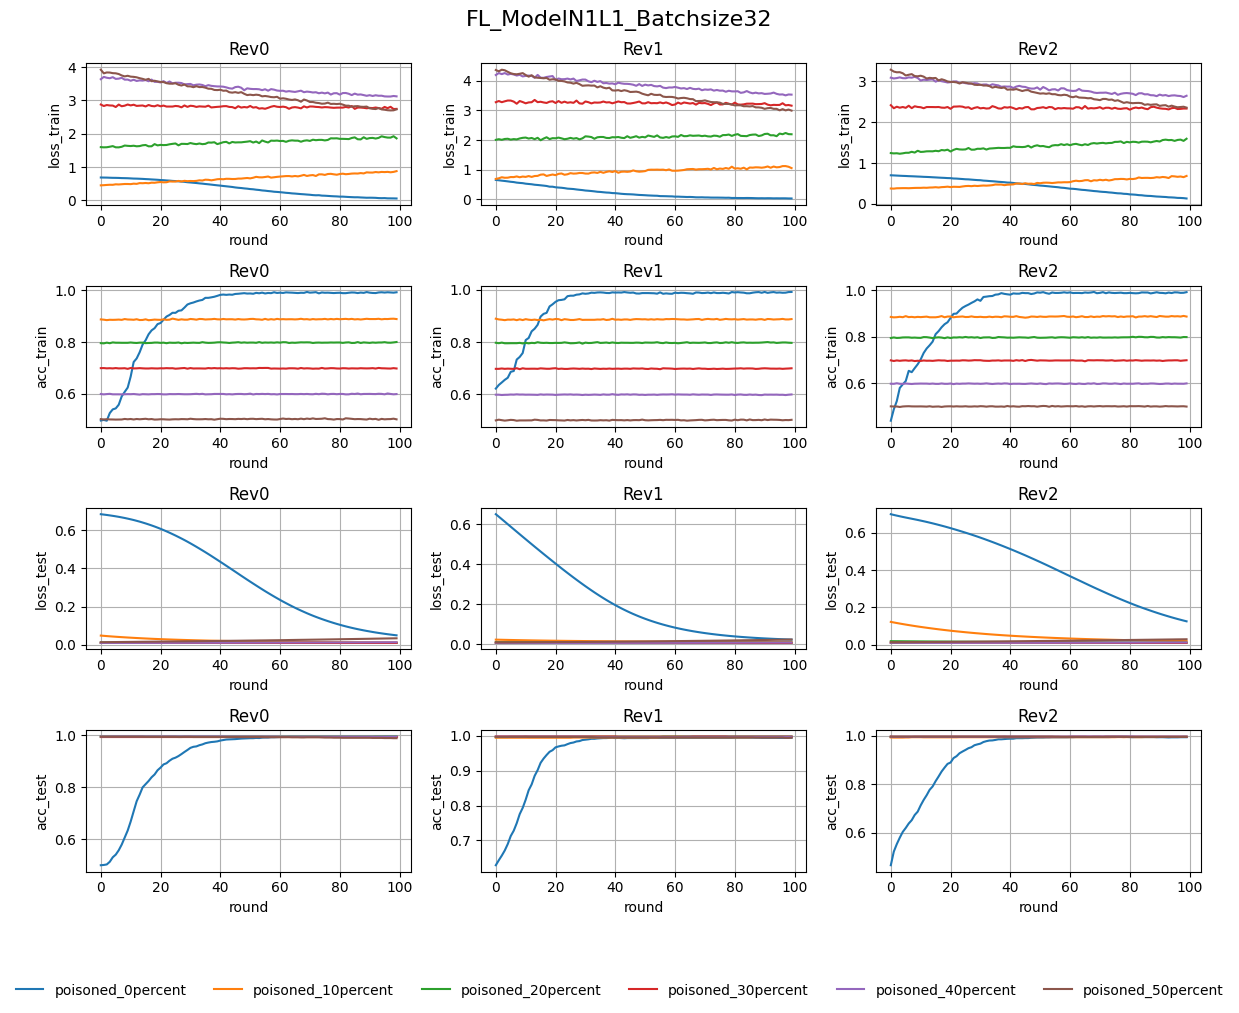

=== Experiment: CL_ModelN1L1_Batchsize32 - Settle Epoch ===
POISONED                  0   10  20  30  40  50
0                         99  99  99  99  99  99
1                         99  99  99  99  99  99
2                         99  99  99  99  99  99
CL_ModelN1L1_Batchsize32  99  99  99  99  99  99


=== Experiment: CL_ModelN1L1_Batchsize32 - Metric: loss_train ===
POISONED                            0         10        20        30  \
0                         1.266602e-06  0.288711  0.624325  0.505384   
1                         1.192093e-07  0.328084  0.248854  0.777869   
2                         1.192093e-07  0.342863  0.324271  0.627650   
CL_ModelN1L1_Batchsize32  1.192093e-07  0.328084  0.324271  0.627650   

POISONED                        40        50  
0                         0.686992  0.666669  
1                         0.638964  0.703407  
2                         0.635499  0.663096  
CL_ModelN1L1_Batchsize32  0.638964  0.666669  


=== Experiment: CL_ModelN1L1_

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

exp_name_list = df_exp['EXPERIMENT'].unique()
# Loop through each CSV file
for i_exp in exp_name_list:

        df_filter = df_exp[df_exp['EXPERIMENT']==i_exp]
             
               
        # Create figure with subplots
        fig, axes = plt.subplots(4, 3, figsize=(12, 10))
        fig.suptitle(f"{i_exp}", fontsize=16)

        for idx,row in df_filter.iterrows():
                
            csv_file = row['CSV']
            sub_f_name = row['SUB_FLODER']
            rev = row['REV']

            # Read CSV into DataFrame
            df = pd.read_csv(csv_file)
            
            
            # Check if required columns exist
            ep_rnd = 'epoch'
            if row['APPROACH'] == 'FL':
                 ep_rnd = 'round'
            required_cols = [ep_rnd]+METRICS
            if not all(col in df.columns for col in required_cols):
                print(f"Skipping {csv_file}: Missing required columns")
                continue

            for i_metric, metric in enumerate(METRICS):
            
                # axes[i_metric, rev].plot(df[ep_rnd], df[metric], marker='o', label=f'{sub_f_name}')
                axes[i_metric, rev].plot(df[ep_rnd], df[metric], label=f'{sub_f_name}')


        for i_metric, metric in enumerate(METRICS):
             for rev in REV:
                axes[i_metric, rev].set_title(f'Rev{rev}')
                axes[i_metric, rev].set_xlabel(ep_rnd)
                axes[i_metric, rev].set_ylabel(f'{metric}')
                axes[i_metric, rev].grid(True)
                # if i_metric==0 and rev ==0:
                    # axes[i_metric, rev].legend()
                    # move legend to bottom out of chart
                    
        # collect handles/labels from the plotted axes (use first row or aggregate)
        handles, labels = [], []
        for rev in [0]:#REV:
            h, l = axes[0, rev].get_legend_handles_labels()
            handles.extend(h)
            labels.extend(l)

        # place a single legend below the figure
        if handles:
            fig.legend(handles, labels, loc='lower center',
                       bbox_to_anchor=(0.5, -0.02), ncol=min(len(labels), 6),
                       frameon=False)

        # leave space for the legend at the bottom
        plt.tight_layout(rect=[0, 0.06, 1, 1])
        # plt.tight_layout()
        
        # Save figure
        # output_name = csv_file.replace('.csv', '_plot.png')
        # plt.savefig(output_name, dpi=300, bbox_inches='tight')
        # print(f"✓ Plotted: {csv_file} -> {output_name}")
        
        plt.show()


# get table value from df_exp for each experiment
dt_list = []
for i_exp in exp_name_list:

        df_filter = df_exp[df_exp['EXPERIMENT']==i_exp]
        
        for idx,row in df_filter.iterrows():
                
            csv_file = row['CSV']
            sub_f_name = row['SUB_FLODER']
            rev = row['REV']

            # Read CSV into DataFrame
            df = pd.read_csv(csv_file)
            
            # Check if required columns exist
            ep_rnd = 'epoch'
            if row['APPROACH'] == 'FL':
                 ep_rnd = 'round'
            required_cols = [ep_rnd]+METRICS
            if not all(col in df.columns for col in required_cols):
                print(f"Skipping {csv_file}: Missing required columns")
                continue

            # get last row values
            last_row = df.iloc[-1]
            # find settle epoch where loss_test does not change more than 0.01 for 5 consecutive epochs
            settle_epoch = df[ep_rnd].iloc[-1]
            # for i in range(len(df)-5):
            #     if all(abs(df['loss_test'].iloc[i+j] - df['loss_test'].iloc[i+j+1]) < 0.05 for j in range(5)):
            #         settle_epoch = df[ep_rnd].iloc[i]
            #         break
            # if settle_epoch is not None:
            #     last_row = df[df[ep_rnd]==settle_epoch].iloc[0]

            data_entry = {
                'NODE':row['NODE'],
                'LAYER':row['LAYER'],
                'REV':rev,
                'APPROACH':row['APPROACH'],
                'EXPERIMENT':i_exp,
                'POISONED':row['POISONED'],
                'SUB_FLODER':sub_f_name,
                'SETTLE_EPOCH':settle_epoch,
            }
            for metric in METRICS:
                data_entry[metric] = last_row[metric]
            dt_list.append(data_entry)
df_results = pd.DataFrame(dt_list)

# list acc_test
dt_last_epoch_list = []
dt_loss_test_list = []
dt_acc_test_list = []
# pivot table for each experiment
# columns by POISONED, index by REV, values by METRICS
for i_exp in exp_name_list:
    df_filter = df_results[df_results['EXPERIMENT']==i_exp]

    pivot_table = df_filter.pivot(index='REV', columns='POISONED', values='SETTLE_EPOCH')
    mediamn_row = pivot_table.median()
    mediamn_row.name = i_exp
    pivot_table = pd.concat([pivot_table, mediamn_row.to_frame().T])
    for col in pivot_table.columns:
        pivot_table[col] = pivot_table[col].astype(int)
    print(f"=== Experiment: {i_exp} - Settle Epoch ===")
    print(pivot_table)
    print("\n")
    dt_last_epoch_list.append({
        'EXPERIMENT':i_exp,
        '0%_poisoned':pivot_table.iloc[-1, 0],
        '10%_poisoned':pivot_table.iloc[-1, 1],
        '20%_poisoned':pivot_table.iloc[-1, 2],
        '30%_poisoned':pivot_table.iloc[-1, 3],
        '40%_poisoned':pivot_table.iloc[-1, 4],
        '50%_poisoned':pivot_table.iloc[-1, 5],
    })

    for metric in METRICS:
        pivot_table = df_filter.pivot(index='REV', columns='POISONED', values=metric)
        # add last median row
        median_row = pivot_table.median()
        median_row.name = i_exp
        pivot_table = pd.concat([pivot_table, median_row.to_frame().T])
        print(f"=== Experiment: {i_exp} - Metric: {metric} ===")
        print(pivot_table)
        if metric == 'loss_test':
            dt_loss_test_list.append({
                'EXPERIMENT':i_exp,
                '0%_poisoned':pivot_table.iloc[-1, 0],
                '10%_poisoned':pivot_table.iloc[-1, 1],
                '20%_poisoned':pivot_table.iloc[-1, 2],
                '30%_poisoned':pivot_table.iloc[-1, 3],
                '40%_poisoned':pivot_table.iloc[-1, 4],
                '50%_poisoned':pivot_table.iloc[-1, 5],
            })
        if metric == 'acc_test':
            dt_acc_test_list.append({
                'EXPERIMENT':i_exp,
                '0%_poisoned':pivot_table.iloc[-1, 0],
                '10%_poisoned':pivot_table.iloc[-1, 1],
                '20%_poisoned':pivot_table.iloc[-1, 2],
                '30%_poisoned':pivot_table.iloc[-1, 3],
                '40%_poisoned':pivot_table.iloc[-1, 4],
                '50%_poisoned':pivot_table.iloc[-1, 5],
            })
        print("\n")

df_last_epoch_summary = pd.DataFrame(dt_last_epoch_list)
print("=== Summary of last epoch metrics ===")
print(df_last_epoch_summary)
df_loss_test_summary = pd.DataFrame(dt_loss_test_list)
print("=== Summary of loss_test ===")
print(df_loss_test_summary)
df_acc_test_summary = pd.DataFrame(dt_acc_test_list)
print("=== Summary of acc_test ===")
print(df_acc_test_summary)

df_last_epoch_summary.to_csv('results/summary_last_epoch_000.csv', index=False)
df_loss_test_summary.to_csv('results/summary_loss_test_000.csv', index=False)
df_acc_test_summary.to_csv('results/summary_acc_test_000.csv', index=False)

print("Done!")